# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import seaborn as sb
import numpy as np
import pandas as pd
import os

# Data Processing

In [2]:
# Read csv into dataframe from training data
train_data = pd.read_csv(os.path.join("Resources", "customer_data.csv"))
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# check number of columns and rows
train_data.shape

(381109, 12)

In [4]:
# check for nulls
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
# check column record counts
train_data.count()

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

In [6]:
# check column data types
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
# create dataframe for EDA
eda_data = pd.DataFrame(train_data)


# create labels for plots
eda_data["Response_Discription"] = train_data["Response"].replace({0: "0 - Not Interested", 1: "1 - Interested"})
eda_data["DL_Discription"] = train_data["Driving_License"].replace({0: "0 - No", 1: "1 - Yes"})

eda_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_Discription,DL_Discription
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1 - Interested,1 - Yes
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0 - Not Interested,1 - Yes
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1 - Interested,1 - Yes
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0 - Not Interested,1 - Yes
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0 - Not Interested,1 - Yes


In [8]:
# datafrome stats
eda_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Exploratory Data Analysis

## Responses

In [9]:
# get reponse counts
response_cnts = eda_data.Response_Discription.value_counts()
response_cnts

0 - Not Interested    334399
1 - Interested         46710
Name: Response_Discription, dtype: int64

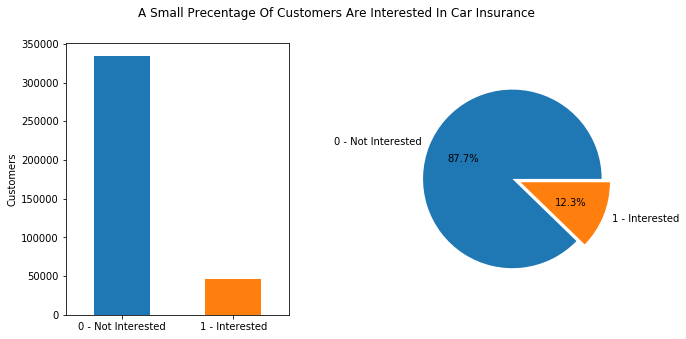

In [10]:
# plot response counts
plt.figure(figsize = (10, 5))

plt.suptitle('A Small Precentage Of Customers Are Interested In Car Insurance')

plt.subplot(1, 2, 1)
response_cnts.plot.bar(color=['#1f77b4', '#ff7f0e'],rot = 0)
plt.ylabel('Customers')

plt.subplot(1, 2, 2)
response_cnts.plot.pie(autopct = '%1.1f%%',explode = [0,0.1]).yaxis.set_visible(False)
plt.subplots_adjust(wspace=.5)

plt.savefig('images/response_bar')

In [11]:
# cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# cycle_colors

## Gender Responses

In [12]:
#  data
gender_pivot = eda_data.pivot_table(index=["Gender"],columns=["Response_Discription"],values="id",aggfunc='count')
gender_pivot

Response_Discription,0 - Not Interested,1 - Interested
Gender,,
Female,156835,18185
Male,177564,28525


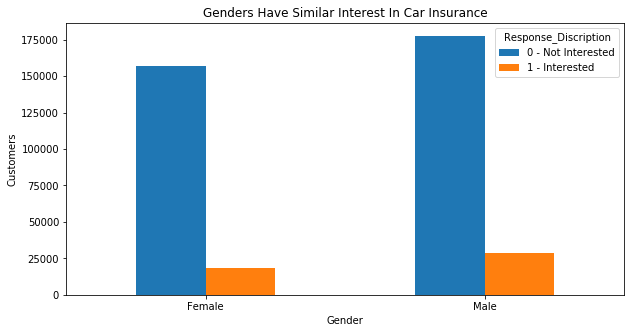

In [13]:
# plot gender respones in a bar chart
gender_pivot.plot(kind="bar", rot = 0, figsize=(10,5))
plt.ylabel('Customers')
plt.title('Genders Have Similar Interest In Car Insurance')

plt.savefig('images/gender_bar')

## Age Group Responses

In [14]:
# Create the decade bins 
bins = [0, 30, 40, 50, 60, 70, 100]

# Create the names for the bins
group_names = ["20 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70+"]

# add bin column to dataframe
eda_data["Age_Group"] = pd.cut(eda_data["Age"], bins, labels=group_names, include_lowest=True)

age_pivot = eda_data.pivot_table(index=["Age_Group"], columns=["Response_Discription"],values="id",aggfunc='count')

age_pivot

Response_Discription,0 - Not Interested,1 - Interested
Age_Group,,
20 to 29,154278,7183
30 to 39,43566,11597
40 to 49,59916,16025
50 to 59,37589,7716
60 to 69,24795,3043
70+,14255,1146


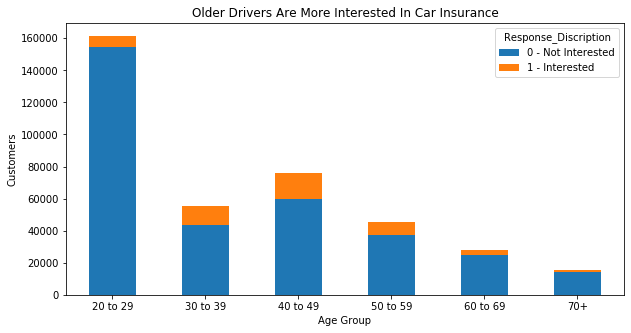

In [15]:
age_pivot.plot(kind="bar", rot=0, stacked=True, figsize=(10,5))
plt.ylabel('Customers')
plt.xlabel('Age Group')
plt.title('Older Drivers Are More Interested In Car Insurance')

plt.savefig('images/age_stackedbar')

## Driving License Responses

In [16]:
# DL reponses counts
dl_pivot = eda_data.pivot_table(index=["DL_Discription"], columns=["Response_Discription"],values="id",aggfunc='count')
dl_pivot

Response_Discription,0 - Not Interested,1 - Interested
DL_Discription,,
0 - No,771,41
1 - Yes,333628,46669


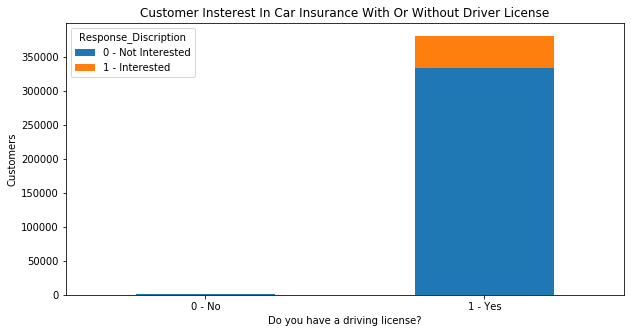

In [17]:
dl_pivot.plot.bar(rot = 0, stacked=True, figsize=(10,5))
plt.ylabel('Customers')
plt.xlabel("Do you have a driving license?")
plt.title('Customer Insterest In Car Insurance With Or Without Driver License')

plt.savefig('images/dl_stackedbar')

## Previouisly Insured Responses

In [18]:
pi_pivot = eda_data.pivot_table(index=["Previously_Insured"], columns=["Response_Discription"],values="id", aggfunc='count').reset_index().rename_axis(None, axis=1)
pi_pivot["Previously_Insured"] = pi_pivot["Previously_Insured"].replace({0: 'No', 1: 'Yes'})
pi_df = pi_pivot.set_index('Previously_Insured')
pi_df

,0 - Not Interested,1 - Interested
Previously_Insured,,
No,159929,46552
Yes,174470,158


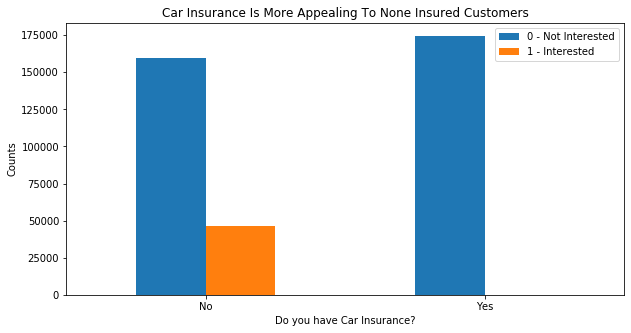

In [19]:
pi_df.plot(kind="bar", rot=0, figsize=(10,5))
plt.ylabel('Counts')
plt.xlabel('Do you have Car Insurance?')
plt.title('Car Insurance Is More Appealing To None Insured Customers')


plt.savefig('images/previously_insured_bar')

## Vehicle Age Responses

In [20]:
#car_age_cnt = df.groupby(["Response","Vehicle_Age"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
car_age_pivot = eda_data.pivot_table(index=["Vehicle_Age"], columns=["Response_Discription"],values="id", aggfunc='count')
car_age_pivot

Response_Discription,0 - Not Interested,1 - Interested
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


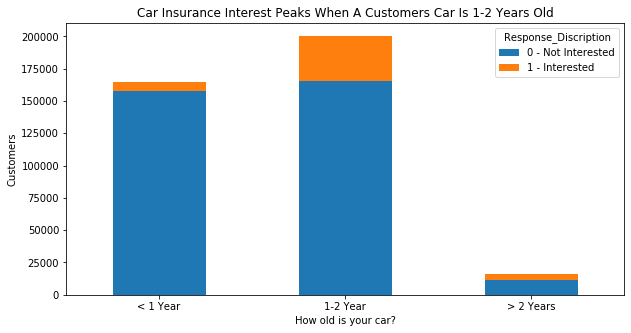

In [21]:
car_age_pivot.reindex(["< 1 Year","1-2 Year","> 2 Years"]).plot.bar(stacked=True, rot = 0, figsize = (10, 5))
plt.ylabel('Customers')
plt.xlabel('How old is your car?')
plt.title('Car Insurance Interest Peaks When A Customers Car Is 1-2 Years Old')

plt.savefig('images/vehicle_age_stackedbar')

## Vehicle Damage

In [23]:
damage_pivot = eda_data.pivot_table(index=["Vehicle_Damage"], columns=["Response_Discription"],values="id", aggfunc='count').reset_index().rename_axis(None, axis=1)
damage_df = damage_pivot.set_index('Vehicle_Damage')
damage_df

,0 - Not Interested,1 - Interested
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


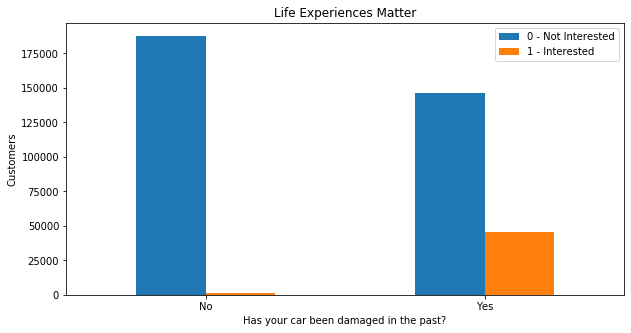

In [24]:
damage_df.plot(kind="bar", rot=0, figsize=(10,5))
plt.ylabel('Customers')
plt.xlabel('Has your car been damaged in the past?')
plt.title('Life Experiences Matter')

plt.savefig('images/vehicle_damage_bar')

## Annual Premiun

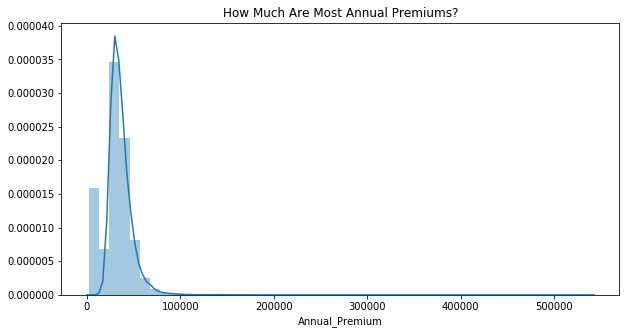

In [25]:
plt.figure(figsize = (10, 5))
sb.distplot(eda_data.Annual_Premium)
plt.title('How Much Are Most Annual Premiums?')

plt.savefig('images/annual_premium_dist')

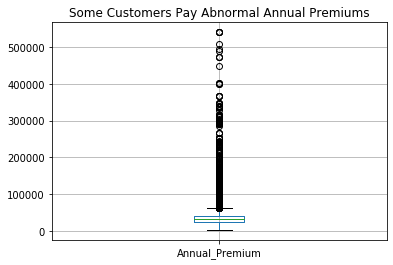

In [26]:
ap = eda_data.Annual_Premium
ap_df = pd.DataFrame(ap)
ap_df.boxplot()
plt.title('Some Customers Pay Abnormal Annual Premiums')

plt.savefig('images/annual_premium_boxplot')

## Vintage Responses

In [27]:
# Create the vintage bins 
bins = [0, 90, 183, 271, 500]

# Create the names for the bins
group_names = ["Under 90 Days", "3 to 6 Months", "6 to 9 Months", "Over 9 Months"]

# add bin column to dataframe
eda_data["Vintage_Group"] = pd.cut(eda_data["Vintage"], bins, labels=group_names, include_lowest=True)

# reorganize columns
vintage_df = eda_data[['Vintage', 'Vintage_Group', 'Response_Discription','id']]
vintage_df.head()

,Vintage,Vintage_Group,Response_Discription,id
0,217,6 to 9 Months,1 - Interested,1
1,183,3 to 6 Months,0 - Not Interested,2
2,27,Under 90 Days,1 - Interested,3
3,203,6 to 9 Months,0 - Not Interested,4
4,39,Under 90 Days,0 - Not Interested,5


In [28]:
vintage_pivot = vintage_df.pivot_table(index=["Vintage_Group"], columns=["Response_Discription"], values="id", aggfunc='count')
vintage_pivot

Response_Discription,0 - Not Interested,1 - Interested
Vintage_Group,,
Under 90 Days,93522,13134
3 to 6 Months,107203,14898
6 to 9 Months,101588,14217
Over 9 Months,32086,4461


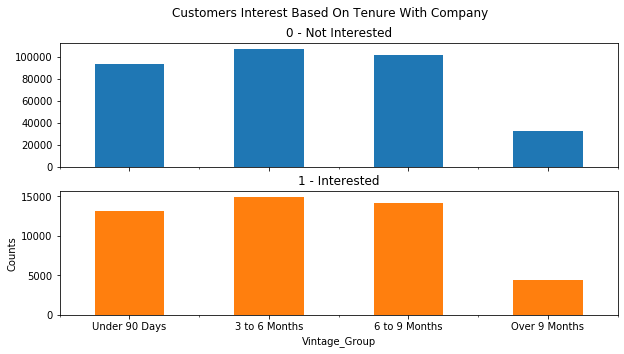

In [29]:
vintage_pivot.plot.bar(rot = 0, subplots=True, figsize=(10,5), legend=False)
plt.suptitle('Customers Interest Based On Tenure With Company')
plt.ylabel('Counts')
plt.savefig('images/vintage_subplots')

## Vintage vs. Annual Premium Scatter

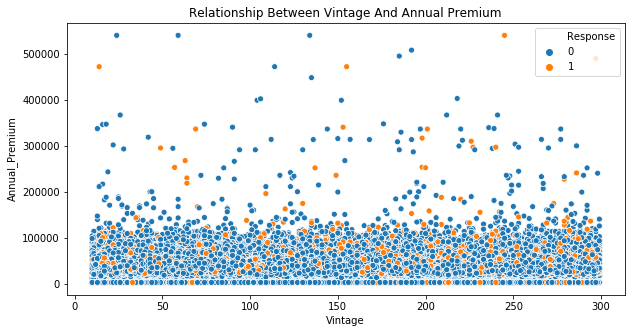

In [30]:
plt.subplots(figsize=(10, 5))
sb.scatterplot(x=eda_data['Vintage'],y=eda_data['Annual_Premium'], hue=eda_data['Response'])

plt.title('Relationship Between Vintage And Annual Premium')

plt.savefig('images/vintage_annual_premium_scatter')

## Age vs. Annual Premium Scatter

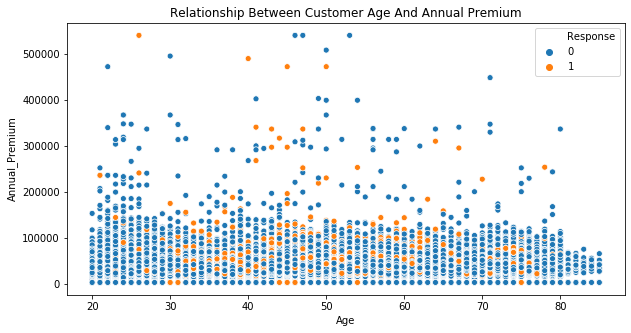

In [31]:
plt.subplots(figsize=(10, 5))
sb.scatterplot(x=eda_data['Age'],y=eda_data['Annual_Premium'], hue=eda_data['Response'])

plt.title('Relationship Between Customer Age And Annual Premium')

plt.savefig('images/age_annual_premium_scatter')

# Feature Engineering

In [32]:
corr_df = eda_data.drop(columns={'id', 'Age_Group', 'Response_Discription','DL_Discription', 'Vintage_Group'})

corr_df["Gender"] = corr_df["Gender"].replace({'Male': 1, 'Female': 0})
corr_df["Vehicle_Age"] = corr_df["Vehicle_Age"].replace({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})
corr_df["Vehicle_Damage"] = corr_df["Vehicle_Damage"].replace({'Yes': 1, 'No': 0})

corr_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


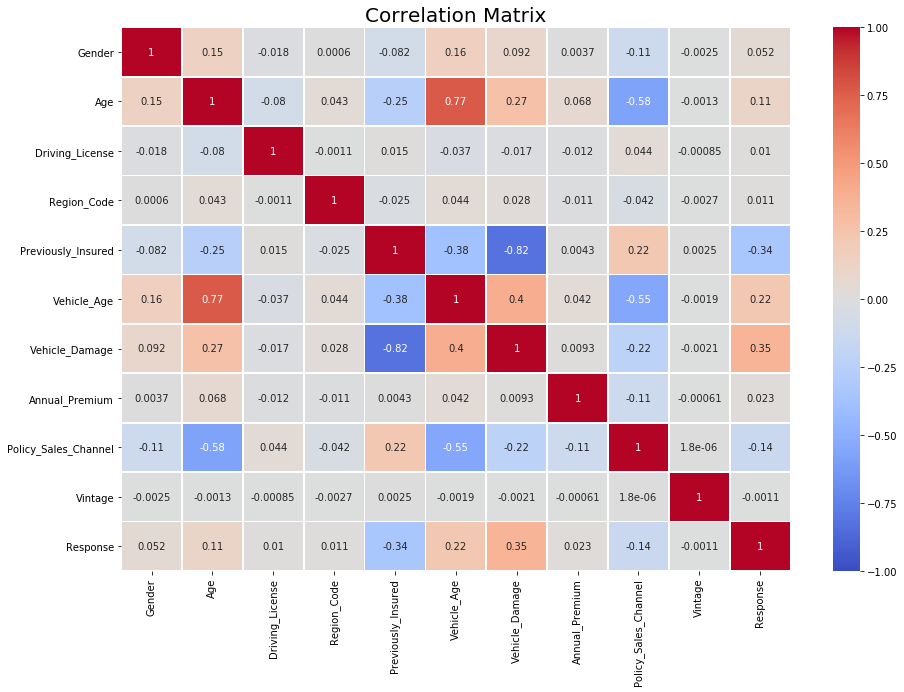

In [33]:
f, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(corr_df.corr(), vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=0.75, annot=True)

plt.title('Correlation Matrix',fontsize=20)

plt.savefig('images/corr_matrix')